In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
base_df = pd.read_stata('cross_border_replication_files/cross_border_main.dta')
base_df.head()

,statename,munname,muncode,year,pop,NCAseg18,negdistNCA18,negdist18,mindistNCA18,mindist18,...,nppm0204p,lexptotalpc,ltot4drugs_value_mexp1,lmarijuana_hectaresp1,lpoppy_hectaresp1,ltotal_4drugs_value18,ldeportable18,lport_ave_earn18,port_emp_rat18,homds_sum
0,Baja California,Mexicali,2002.0,2002-01-01,793103.0,0.0,0.915787,0.935095,0.084213,0.064905,...,1.0,-6.579107,18.980207,0.574082,0.000000,19.488834,11.592411,10.222232,0.352164,516.0
1,Baja California,Mexicali,2002.0,2003-01-01,814899.0,0.0,0.915787,0.935095,0.084213,0.064905,...,1.0,-6.399465,18.352587,5.392031,3.281851,19.432281,11.430619,10.249273,0.356448,516.0
2,Baja California,Mexicali,2002.0,2004-01-01,835867.0,0.0,0.915787,0.935095,0.084213,0.064905,...,1.0,-6.281058,18.576866,2.872377,2.668061,19.468000,11.218111,10.272012,0.350987,516.0
3,Baja California,Mexicali,2002.0,2005-01-01,854879.0,0.0,0.915787,0.935095,0.084213,0.064905,...,1.0,-6.250871,19.014620,0.000000,0.000000,19.957548,10.928202,10.308653,0.353121,516.0
4,Baja California,Mexicali,2002.0,2006-01-01,873937.0,0.0,0.915787,0.935095,0.084213,0.064905,...,1.0,-6.086829,18.065960,0.000000,0.000000,20.603355,11.026288,10.310818,0.360647,516.0


`keep if border==1`    
`collapse (sum) homicide homdguns nongunhom suicdguns , by(NCAseg18 year)`

In [6]:
df = (base_df[base_df['border']==1] #filter
    .groupby(['NCAseg18', 'year']).sum()[['homicide', 'homdguns', 'nongunhom', 'suicdguns']] #collapsing by NCA and year
    .reset_index())
df

,NCAseg18,year,homicide,homdguns,nongunhom,suicdguns
0,0.0,2002-01-01,378.0,248.0,121.0,13.0
1,0.0,2003-01-01,404.0,250.0,152.0,7.0
2,0.0,2004-01-01,423.0,278.0,144.0,2.0
3,0.0,2005-01-01,385.0,246.0,138.0,2.0
4,0.0,2006-01-01,392.0,268.0,117.0,4.0
5,1.0,2002-01-01,529.0,303.0,153.0,49.0
6,1.0,2003-01-01,501.0,325.0,127.0,56.0
7,1.0,2004-01-01,497.0,269.0,175.0,52.0
8,1.0,2005-01-01,641.0,389.0,180.0,38.0
9,1.0,2006-01-01,670.0,451.0,159.0,27.0


In [7]:
df.to_csv('nca_deaths.csv', index=False)

Note: Segment NCA is an indicator that equals 1 if a municipio lies adjacent to TX, AZ, and NM (the “non-CA segment”), as opposed to the “CA segment” of the border.  
`twoway `  
`line homicide year if NCAseg18==0, lcolor(blue) lpattern(-.-) lwidth(thick) ||`  
`line homicide year if NCAseg18==1, lcolor(cranberry) lpattern(.) lwidth(thick)`  
`graphregion(color(white)) legend(region(color(white)) col(3) order(1 "CA" 2 "AZ, NM, TX"))`  
`xline(2004, lcolor(gray) lpattern(-)) ylabel(, angle(0)) scale(1) ylabel(0(100)700)`  
`xtitle("Year") ytitle("Count") aspect(1.0) title("All Homicides", margin(medsmall)) name(homds, replace);`  


In [34]:
def formatting(title):
    plt.xticks(rotation=90)
    plt.ylim(0,700)
    plt.title(title)
    plt.legend()
    plt.axvline('2004-01-01', color='black', linestyle='--')

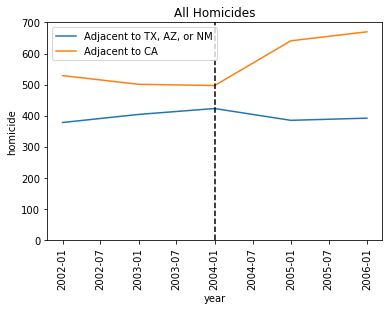

In [35]:
sns.lineplot('year', 'homicide', data=df[df['NCAseg18']==0], label='Adjacent to TX, AZ, or NM')
sns.lineplot('year', 'homicide', data=df[df['NCAseg18']==1], label='Adjacent to CA')
formatting('All Homicides')

`twoway`   
`line homdguns year if NCAseg18==0, lcolor(blue) lpattern(-.-) lwidth(thick) ||`  
`line homdguns year if NCAseg18==1, lcolor(cranberry) lpattern(.) lwidth(thick)`  
`graphregion(color(white)) legend(region(color(white)) col(3) order(1 "CA" 2 "AZ, NM, TX"))`   
`xline(2004, lcolor(gray) lpattern(-)) ylabel(, angle(0)) scale(1) ylabel(0(100)700)`  
`xtitle("Year") ytitle("Count") aspect(1.0) title("Gun-related Homicides", margin(medsmall)) name(homdguns, replace);`


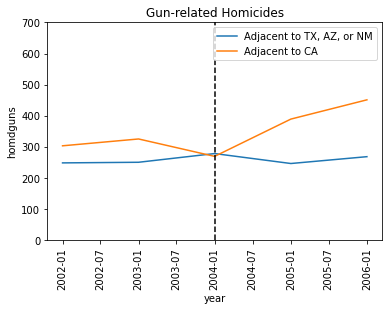

In [36]:
sns.lineplot('year', 'homdguns', data=df[df['NCAseg18']==0], label='Adjacent to TX, AZ, or NM')
sns.lineplot('year', 'homdguns', data=df[df['NCAseg18']==1], label='Adjacent to CA')
formatting('Gun-related Homicides')

`twoway`   
`line nongunhom year if NCAseg18==0, lcolor(blue) lpattern(-.-) lwidth(thick) ||`  
`line nongunhom year if NCAseg18==1, lcolor(cranberry) lpattern(.) lwidth(thick)`  
`graphregion(color(white)) legend(region(color(white)) col(3) order(1 "CA" 2 "AZ, NM, TX"))`   
`xline(2004, lcolor(gray) lpattern(-)) ylabel(, angle(0)) scale(1) ylabel(0(100)700)`  
`xtitle("Year") ytitle("Count") aspect(1.0) title("Non-gun Homicides", margin(medsmall))name(nongunhom, replace);`  


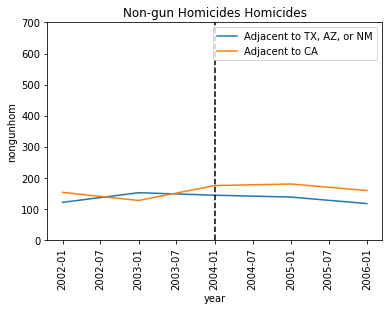

In [37]:
sns.lineplot('year', 'nongunhom', data=df[df['NCAseg18']==0], label='Adjacent to TX, AZ, or NM')
sns.lineplot('year', 'nongunhom', data=df[df['NCAseg18']==1], label='Adjacent to CA')
formatting('Non-gun Homicides Homicides')

`twoway`   
`line suicdguns year if NCAseg18==0, lcolor(blue) lpattern(-.-) lwidth(thick) ||`  
`line suicdguns year if NCAseg18==1, lcolor(cranberry) lpattern(.) lwidth(thick)`  
`graphregion(color(white)) legend(region(color(white)) col(3) order(1 "CA" 2 "AZ, NM, TX"))`   
`xline(2004, lcolor(gray) lpattern(-)) ylabel(, angle(0)) scale(1) ylabel(0(100)700)`  
`xtitle("Year") ytitle("Count") aspect(1.0) title("Gun-related Suicides", margin(medsmall)) name(suicdguns, replace);`  


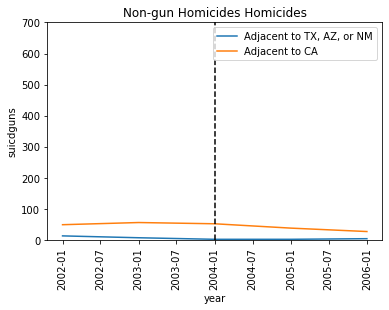

In [38]:
sns.lineplot('year', 'suicdguns', data=df[df['NCAseg18']==0], label='Adjacent to TX, AZ, or NM')
sns.lineplot('year', 'suicdguns', data=df[df['NCAseg18']==1], label='Adjacent to CA')
formatting('Non-gun Homicides Homicides')